# Analysis of Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings('ignore')
%matplotlib inline

## Import the CSV Data

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
1,210,I,0.370,0.280,0.095,0.2655,0.1220,0.0520,0.080,7
2,333,I,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.156,10
3,111,M,0.495,0.395,0.125,0.5415,0.2375,0.1345,0.155,9
4,77,M,0.595,0.475,0.140,0.9440,0.3625,0.1890,0.315,9


Data is standardize already for no  standardization

In [3]:
df.shape

(308, 10)

Check missing values

In [4]:
df.isna().sum()

id                0
sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

Check duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              308 non-null    int64  
 1   sex             308 non-null    object 
 2   length          308 non-null    float64
 3   diameter        308 non-null    float64
 4   height          308 non-null    float64
 5   whole_weight    308 non-null    float64
 6   shucked_weight  308 non-null    float64
 7   viscera_weight  308 non-null    float64
 8   shell_weight    308 non-null    float64
 9   rings           308 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 24.2+ KB


In [8]:
df.describe()

,id,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.00000
mean,173.441558,0.491250,0.385601,0.135049,0.731093,0.285502,0.158534,0.234782,10.87987
std,100.524779,0.125718,0.103905,0.041822,0.476026,0.181122,0.101806,0.163721,4.03105
min,1.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.00000
25%,83.750000,0.415000,0.320000,0.105000,0.352625,0.140875,0.075375,0.115000,8.00000
50%,176.500000,0.515000,0.405000,0.135000,0.689000,0.274000,0.151000,0.210000,10.00000
75%,260.250000,0.580000,0.461250,0.165000,1.013000,0.394875,0.222875,0.325000,13.00000
max,343.000000,0.725000,0.575000,0.240000,2.550000,1.070500,0.541000,1.005000,26.00000


In [10]:
df.nunique()

id                308
sex                 3
length             93
diameter           82
height             43
whole_weight      289
shucked_weight    283
viscera_weight    247
shell_weight      137
rings              23
dtype: int64

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['id', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

We have 1 categorical features : ['sex']


In [12]:
# Display unique values for each categorical column
for col in categorical_features:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")




Column: sex
Unique Values: ['I' 'M' 'F']


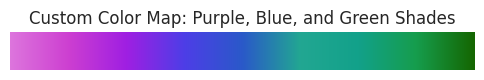

In [20]:
# Define the colors for the custom colormap
colors = [
    "#dd75dd",
    "#cd3fd1",
    "#9f1fe2",
    "#4d3ee7",
    "#2a59c9",
    "#22a792",
    "#12a18a",
    "#169d4d",
    "#146601"
]

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_purple_blue_green", colors)

# Test the custom colormap by displaying it
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 0.5))
plt.imshow(gradient, aspect='auto', cmap=custom_cmap)
plt.axis('off')
plt.title('Custom Color Map: Purple, Blue, and Green Shades', fontsize=12)
plt.show()


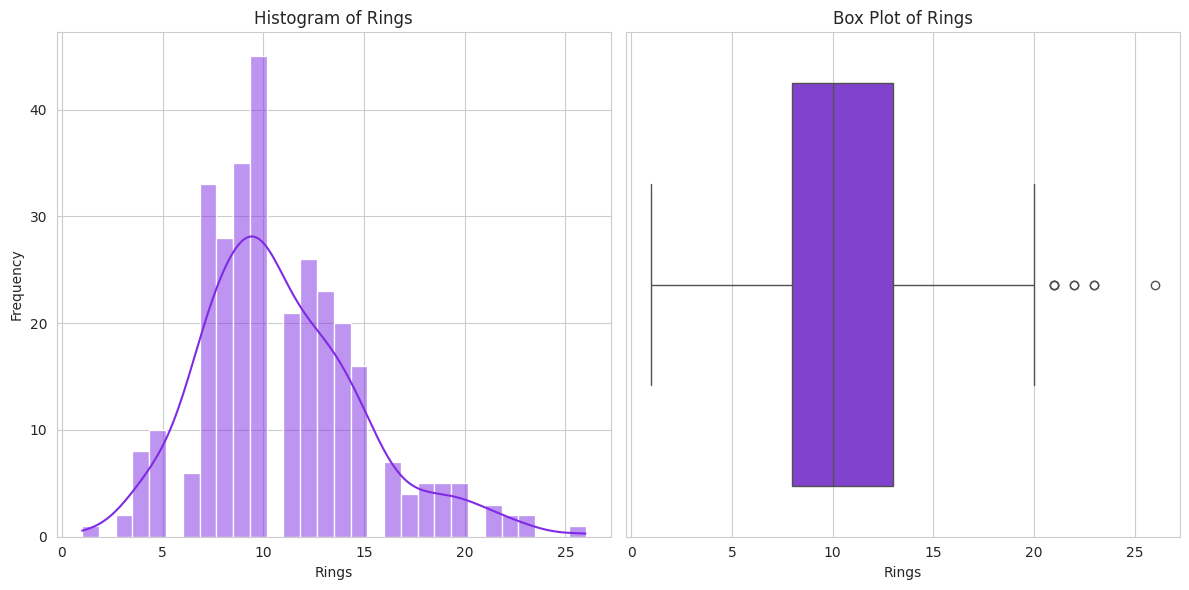

In [21]:
sns.set_style("whitegrid")

# Create subplots for histogram and box plot
plt.figure(figsize=(12, 6))

# Histogram for 'Rings'
plt.subplot(1, 2, 1)
sns.histplot(df['rings'], bins=30, color=custom_cmap(0.3),kde=True)
plt.title('Histogram of Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')

# Box plot for 'Rings'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['rings'])
plt.title('Box Plot of Rings')
plt.xlabel('Rings')

plt.tight_layout()
plt.show()


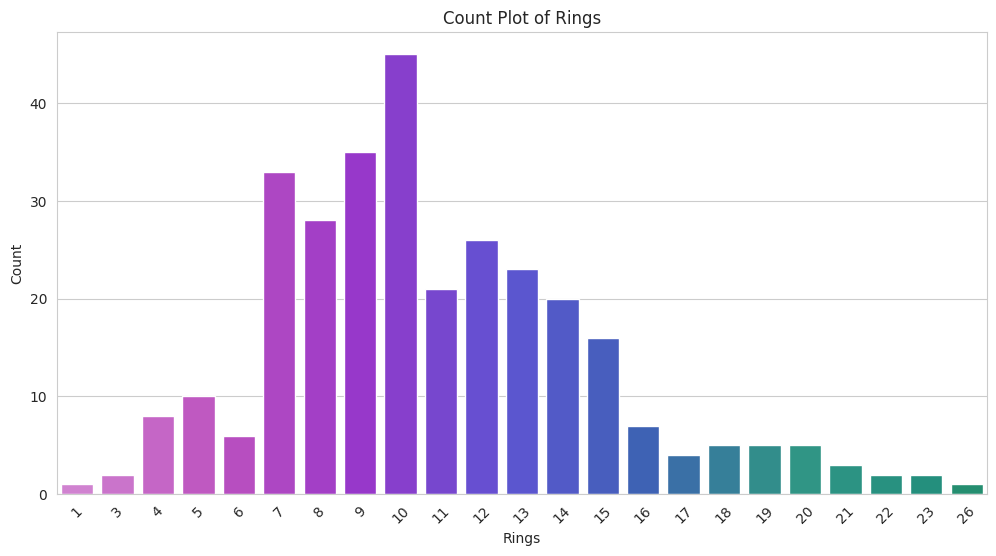

In [22]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Count plot for 'Rings'
sns.countplot(x='rings', data=df, palette=[custom_cmap(i/28) for i in range(df['rings'].nunique())])

# Adding titles and labels
plt.title('Count Plot of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

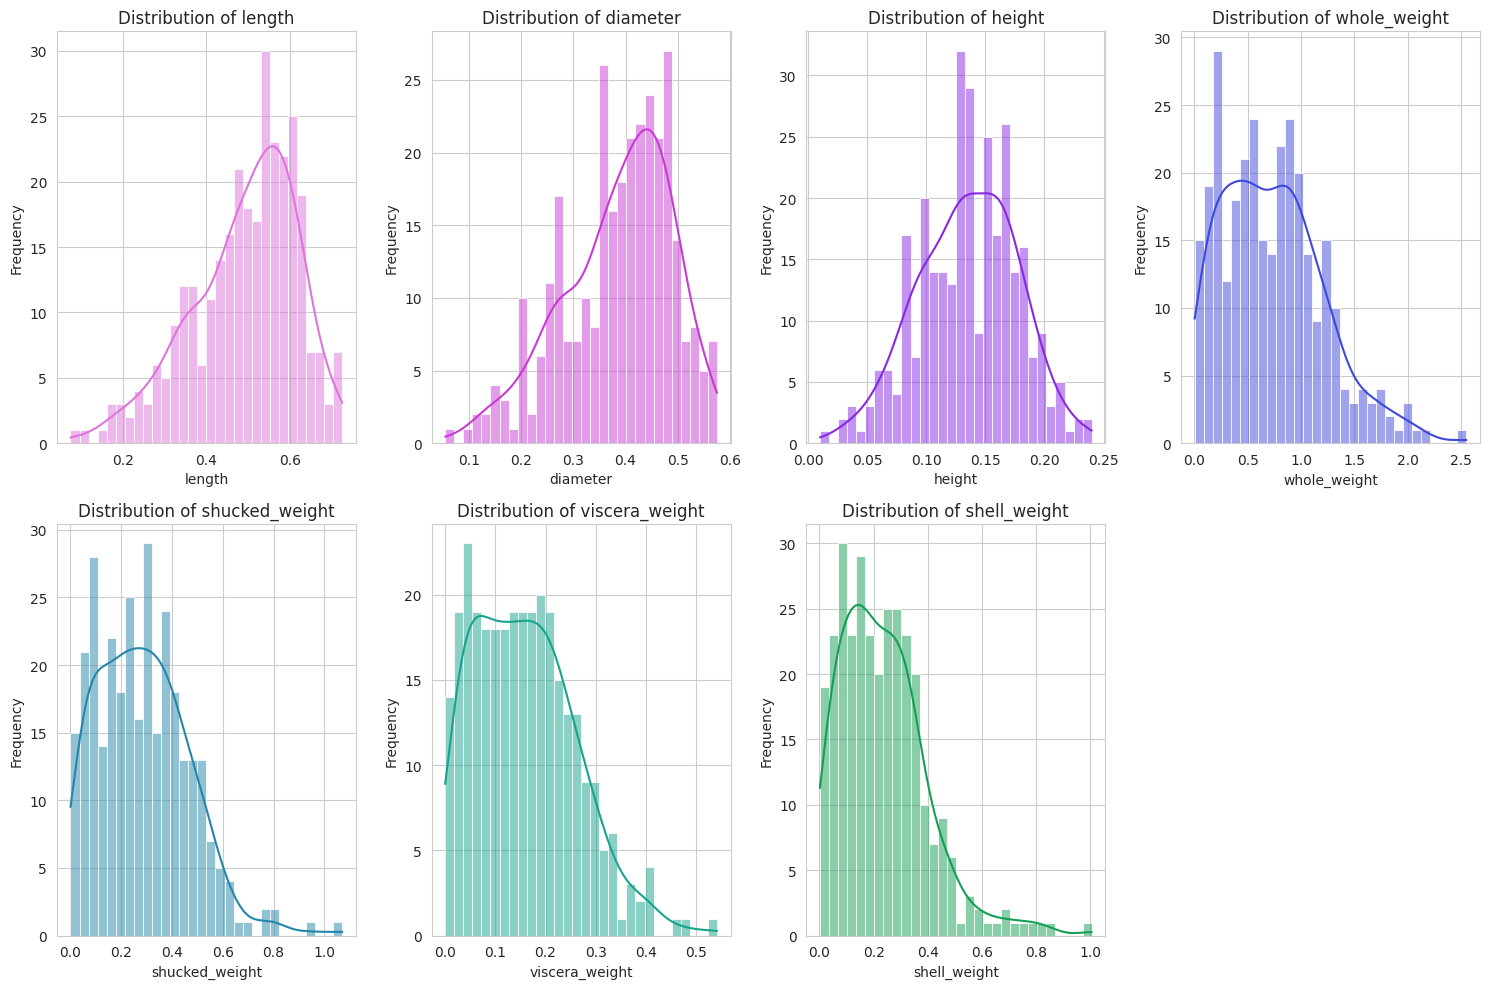

In [24]:
# Define columns to analyze
columns_to_analyze = ['length', 'diameter', 'height', 'whole_weight',
                       'shucked_weight', 'viscera_weight', 'shell_weight']

# Create histograms for each column in the specified list
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_analyze):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[column], bins=30, color=custom_cmap(i / len(columns_to_analyze)), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()